In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#  Linear Regression


## Exercise 

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

Utilizar [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)





### Understanding Data

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per us\$10,000
- PTRATIO - pupil-teacher ratio by town
- B  $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in us\$1000's

Descriptive analytics

- What questions would you ask to understand the data?
- What visualization tools to use?

In [ ]:

boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

print(boston.data.shape) #get (numer of rows, number of columns or 'features')
print(boston.DESCR) #get a description of the dataset
boston_df.describe()

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


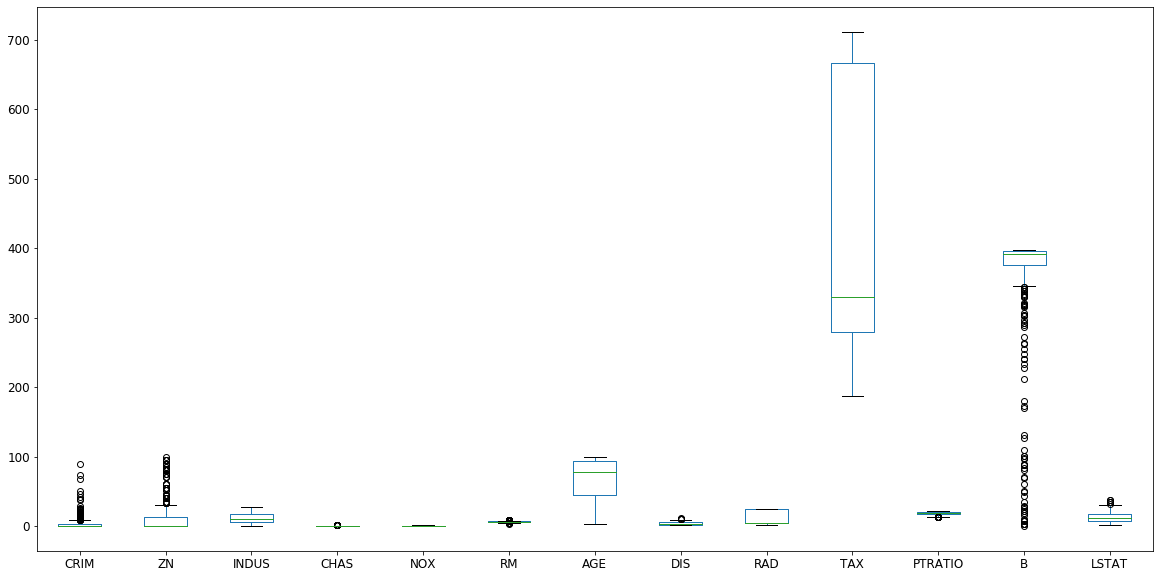

In [ ]:
boston_df.plot.box(figsize=(20,10))

### Preparing the data



In [ ]:
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


#### Split training and text data

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

In [ ]:

# split training and text data
X=boston_df.drop('Price',axis=1)
y=boston_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1212)

### Modeling

#### Train the model

Train the models consist in  make  the optimization to obtain the long memory paramters of the model.

In [ ]:
# Create linear regressor object (in an array to train all)

#TODO: add Lasso Models:$\alpha = 100$',r'Lasso, $\alpha = 0.001$',r'Lasso, $\alpha = 0.7$'
names=['Linear Regression',r'Ridge; $\alpha = 0.01$',r'Ridge; $\alpha = 100$',r'Lasso, $\alpha = 0.001$',r'Lasso, $\alpha = 0.7$']
models = [LinearRegression(),Ridge(alpha=0.01),Ridge(alpha=100)]


for regr,names in zip(models,names):
  regr.fit(X_train, y_train)
  # The coefficients
  print('model ',name)
  print('Coefficients: ', regr.coef_)
  print('Intercept: ', regr.intercept_)



Coefficients:  [-9.71690750e-02  4.40216888e-02  5.99318110e-02  2.81326767e+00
 -1.73330120e+01  3.51862631e+00  2.71366690e-03 -1.42521321e+00
  3.20482276e-01 -1.44230960e-02 -9.73203538e-01  6.69087758e-03
 -5.80727844e-01]
Intercept:  39.97772554872658
Coefficients:  [-9.70964229e-02  4.40379114e-02  5.92963044e-02  2.81097291e+00
 -1.71879712e+01  3.52060509e+00  2.57075374e-03 -1.42309630e+00
  3.20223898e-01 -1.44370238e-02 -9.71479573e-01  6.69450657e-03
 -5.80908916e-01]
Intercept:  39.87013288728727
Coefficients:  [-0.08687147  0.05223901 -0.00694598  0.55763387 -0.20509164  2.02124599
  0.00556098 -1.0617979   0.34326505 -0.01855334 -0.82678013  0.00636268
 -0.73149656]
Intercept:  39.805626811206196
Coefficients:  [-9.69885059e-02  4.40574115e-02  5.85378810e-02  2.79544109e+00
 -1.70050782e+01  3.52108037e+00  2.43471934e-03 -1.42002823e+00
  3.19921969e-01 -1.44563189e-02 -9.69402500e-01  6.70013046e-03
 -5.81320590e-01]
Intercept:  39.747210740705015
Coefficients:  [-0.

Understanding the difference

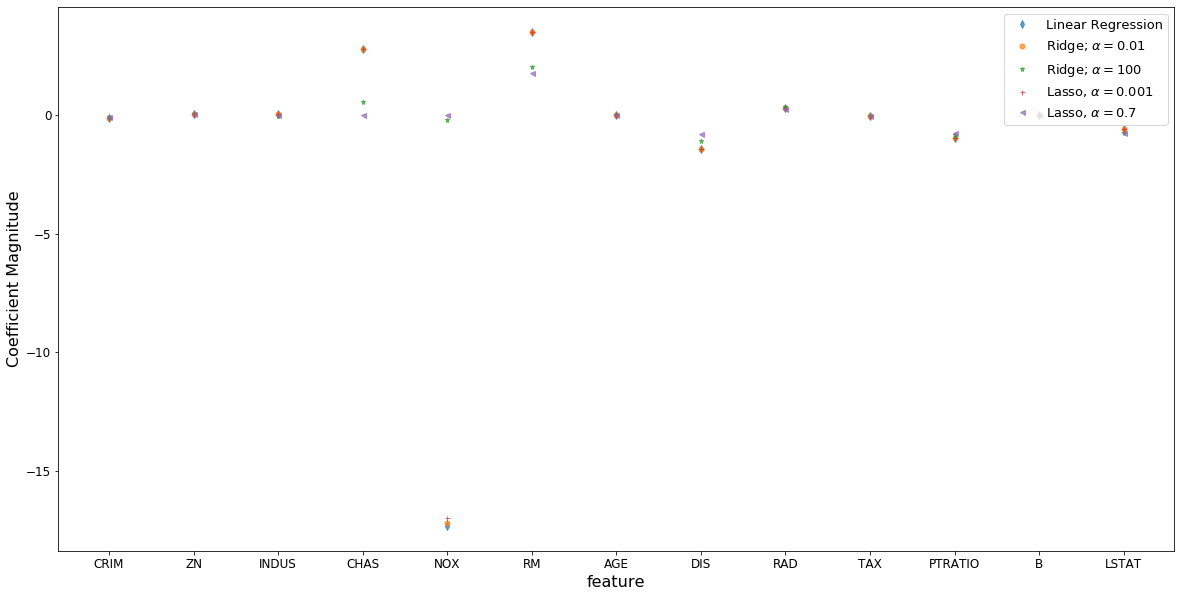

In [ ]:

markers=['d','o','*','+','<','>']
plt.figure(figsize=(20,10))
for i in range(0,len(names)):
  plt.plot(X.columns,models[i].coef_,alpha=0.7,linestyle='none',marker=markers[i],markersize=5,label=names[i])
plt.xlabel('feature',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=1)
plt.show()


## Which is the best model?

When evaluating different settings (“hyperparameters”) for estimators or differents models, there are the risk of overfitting on the test set because the selection of the model can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). 

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include gamma for Ridge, alpha for Lasso, etc.  It is possible and recommended to search the hyper-parameter space for the best cross validation score.

Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use:

estimator.get_params()

Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) exhaustively considers all parameter combinations, while [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) can sample a given number of candidates from a parameter space with a specified distribution.

[More information](https://scikit-learn.org/stable/modules/grid_search.html)

In [ ]:

from sklearn.model_selection import cross_val_score

#from https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring =['explained_variance',
          'neg_mean_absolute_error',
          'neg_mean_squared_error',
          'neg_mean_squared_log_error',
          'neg_median_absolute_error',
          'r2']

#TODO: try differents score, whyis the best?
#score?
for reg,name in zip(models,names):
    scores = cross_val_score(reg, X_train, y_train.ravel(), scoring=score,
                            cv=5)
    print('--------------------------------------')
    print('model {0:20} | score {1:20}'.format(name,score))
    print('mean {0:22.2f}| std   {1:<22.2f}'.format(scores.mean(),scores.std()))

--------------------------------------
model Linear Regression    | score r2                  
mean                   0.71| std   0.04                  
--------------------------------------
model Ridge; $\alpha = 0.01$ | score r2                  
mean                   0.71| std   0.04                  
--------------------------------------
model Ridge; $\alpha = 100$ | score r2                  
mean                   0.69| std   0.04                  
--------------------------------------
model Lasso, $\alpha = 0.001$ | score r2                  
mean                   0.71| std   0.04                  
--------------------------------------
model Lasso, $\alpha = 0.7$ | score r2                  
mean                   0.68| std   0.04                  


## Exercise (try other models)

Try to use [Elastic-NET](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), [RANSAC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) and [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)


### Test the Model

Can we generalize our model to work good with other data?

In [ ]:
from sklearn.metrics import accuracy_score,median_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_log_error,explained_variance_score


def test_model(X,y_test,regr):
  #prediction
  y_pred=regr.predict(X)
  ##graficas
  plt.scatter(y_pred, y_test,  color='black')
  plt.xlabel('expected value')
  plt.ylabel('Predicted value')
  plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
  plt.grid(True)
  # https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
  print('{0:30} | {1:9.2f}'.format('regressor score', regr.score(X,y_test)))
  print('{0:30} | {1:9.2f}'.format('Mean squared error', np.mean((y_pred - y_test) ** 2)))
  print('{0:30} | {1:9.2f}'.format('mean_squared_error', mean_squared_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('mean_absolute_error', mean_absolute_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('median_absolute_error', median_absolute_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('explained_variance_score', explained_variance_score(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('r ^ 2 score', r2_score(y_test,y_pred)))

#TODO:  
# test_model(X_test,y_test,best_model)

### Implementation


How it is going to work inside the process and organization?

## Ejercicio 

A partir de la comprensión inicial de los datos de Fasecolda (ejercicio 1) o otro dataset de su elección

- ¿cuales serian las mejores variables de entrada para hacer la regresión y porque?
- ¿Que otras fuentes de información utilizaría para para mejorar la predicción realizada?

- Que transformaciones requiere realizar sobre los datos

- Que ejercicio de regresión realizaria ?

- Seria util realizar una regresión de Lasso? por que?

- ¿que técnicas de visualización o muestra de resultados aplicaría?










In [ ]:
# Load CSV using Pandas from URL
import pandas as pd
from IPython.display import display, HTML

data = pd.read_csv('guia_fasecolda.csv')

## Presente sus conclusiones sobre regresiones



Se recomienda subir el notebook a github
